In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from textwrap import wrap

SMALL_SIZE, MEDIUM_SIZE, BIG_SIZE = 10, 12, 20
plt.rc('font', size=MEDIUM_SIZE)       
plt.rc('axes', titlesize=BIG_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)  
plt.rc('xtick', labelsize=MEDIUM_SIZE) 
plt.rc('ytick', labelsize=MEDIUM_SIZE) 
plt.rc('legend', fontsize=SMALL_SIZE)  
plt.rc('figure', titlesize=BIG_SIZE)
my_colors = 'rgbkymc'

from IPython.display import display, Javascript
disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""
display(Javascript(disable_js))



<IPython.core.display.Javascript object>

In [5]:
!wget -O bangalore-cas-alerts.csv https://raw.githubusercontent.com/akilagithub/Capstone/master/bangalore-cas-alerts.csv


--2020-03-16 04:20:00--  https://raw.githubusercontent.com/akilagithub/Capstone/master/bangalore-cas-alerts.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.56.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.56.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22720347 (22M) [text/plain]
Saving to: ‘bangalore-cas-alerts.csv’

100%[======================================>] 22,720,347   132MB/s   in 0.2s   

2020-03-16 04:20:00 (132 MB/s) - ‘bangalore-cas-alerts.csv’ saved [22720347/22720347]



In [6]:
train_data = pd.read_csv('bangalore-cas-alerts.csv')

In [7]:
train_data.head(10)

,deviceCode_deviceCode,deviceCode_location_latitude,deviceCode_location_longitude,deviceCode_location_wardName,deviceCode_pyld_alarmType,deviceCode_pyld_speed,deviceCode_time_recordedTime_$date
0,864504031502210,12.984595,77.744087,Kadugodi,PCW,32,2018-02-01T01:48:59.000Z
1,864504031502210,12.984595,77.744087,Kadugodi,PCW,32,2018-02-01T01:48:59.000Z
2,864504031502210,12.987233,77.741119,Garudachar Playa,FCW,41,2018-02-01T01:50:00.000Z
3,864504031502210,12.987233,77.741119,Garudachar Playa,FCW,41,2018-02-01T01:50:00.000Z
4,864504031502210,12.987503,77.740051,Hudi,Overspeed,37,2018-02-01T01:50:11.000Z
5,864504031502210,12.987503,77.740051,Hudi,Overspeed,37,2018-02-01T01:50:11.000Z
6,864504031502210,12.987523,77.736702,Kadugodi,HMW,32,2018-02-01T01:50:50.000Z
7,864504031502210,12.987523,77.736702,Kadugodi,HMW,32,2018-02-01T01:50:50.000Z
8,864504031502210,12.988210,77.731369,Hudi,Overspeed,27,2018-02-01T01:52:26.000Z
9,864504031502210,12.988210,77.731369,Hudi,Overspeed,27,2018-02-01T01:52:26.000Z


In [8]:
train_data.shape

(207617, 7)

Remove duplicates

In [9]:
train_data.drop_duplicates(inplace=True)
train_data.shape

(152276, 7)

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152276 entries, 0 to 207616
Data columns (total 7 columns):
deviceCode_deviceCode                 152276 non-null int64
deviceCode_location_latitude          152276 non-null float64
deviceCode_location_longitude         152276 non-null float64
deviceCode_location_wardName          152276 non-null object
deviceCode_pyld_alarmType             152276 non-null object
deviceCode_pyld_speed                 152276 non-null int64
deviceCode_time_recordedTime_$date    152276 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 9.3+ MB


In [11]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
deviceCode_deviceCode,152276.0,8.641311e+14,2.963658e+11,8.620100e+14,8.639770e+14,8.639770e+14,8.645040e+14,8.645040e+14
deviceCode_location_latitude,152276.0,1.297075e+01,2.663822e-02,1.268666e+01,1.295651e+01,1.297310e+01,1.298773e+01,1.307008e+01
deviceCode_location_longitude,152276.0,7.772170e+01,2.972414e-02,7.750818e+01,7.770688e+01,7.772740e+01,7.774370e+01,7.780682e+01
deviceCode_pyld_speed,152276.0,2.214478e+01,1.371225e+01,0.000000e+00,1.100000e+01,2.200000e+01,3.200000e+01,8.300000e+01


Rename the column names

In [19]:
columns={
            "deviceCode_deviceCode" : "deviceCode",
            "deviceCode_location_latitude" : "latitude",
            "deviceCode_location_longitude" : "longitude",
            "deviceCode_location_wardName" : "wardName",
            "deviceCode_pyld_alarmType" : "alarmType",
            "deviceCode_pyld_speed" : "speed",
            "deviceCode_time_recordedTime_$date" : "recordedDateTime"
        }

train_data.rename(columns=columns, inplace=True)
print("NEw column names:", train_data.columns)

NEw column names: Index(['deviceCode', 'latitude', 'longitude', 'wardName', 'alarmType', 'speed',
       'recordedDateTime'],
      dtype='object')


Finding the range of co-ordinates within which the data belongs.

In [20]:
lat_max = train_data.latitude.max()
lat_min = train_data.latitude.min()
print("Latitude:", lat_max, lat_min)

lon_max = train_data.longitude.max()
lon_min = train_data.longitude.min()
print("Longtitude:", lon_max, lon_min)

Latitude: 13.070075035095215 12.686662673950195
Longtitude: 77.80682373046875 77.5081787109375


Plot of the co ordinates

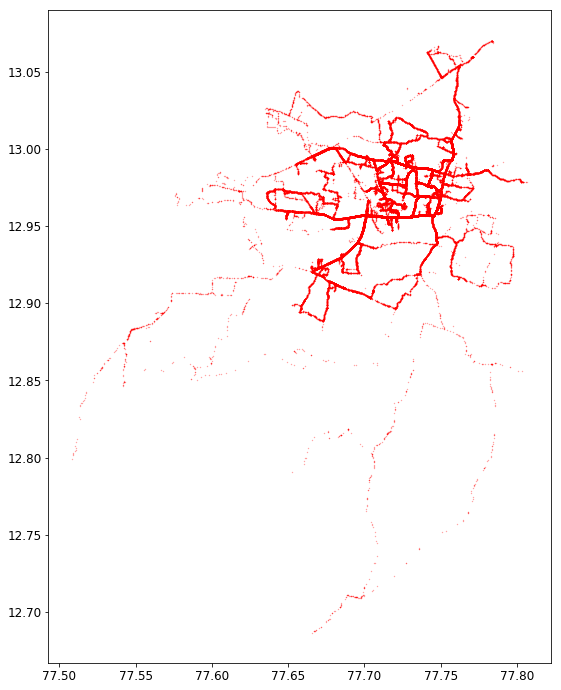

In [14]:
fig, axes = plt.subplots(figsize=(9,12))
axes.scatter(train_data.longitude, train_data.latitude, s=0.1, alpha=0.5, c='r')
plt.show()

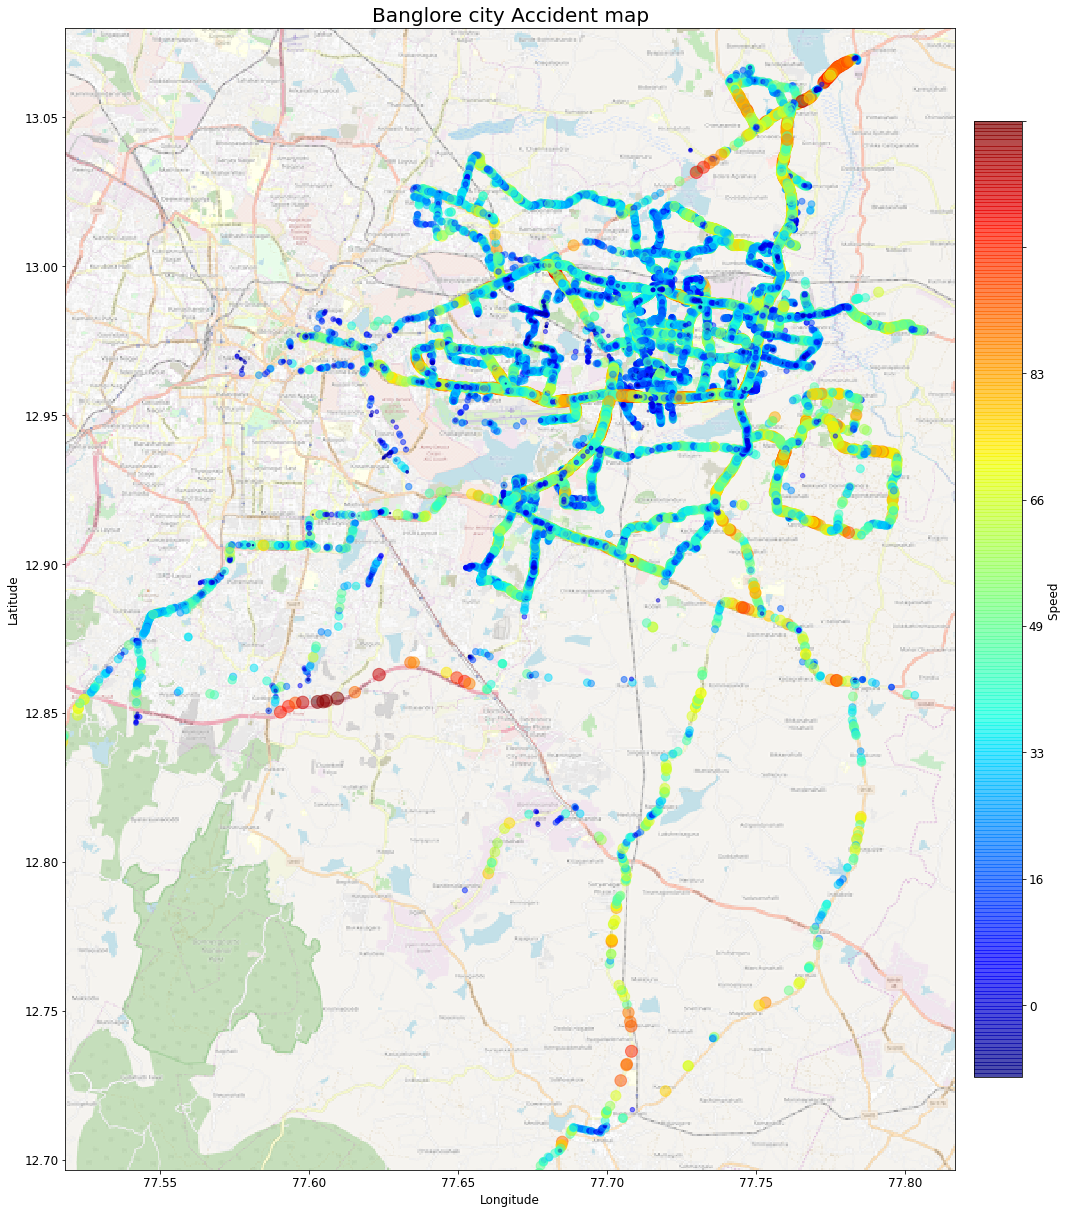

In [21]:

bangalore_map_img = 'https://lh3.googleusercontent.com/np8igtYRrHpe7rvJwMzVhbyUZC4Npgx5fRznofRoLVhP6zcdBW9tfD5bC4FbF2ITctElCtBrOn7VH_qEBZMVoPrTFipBdodufT0QU1NeeQVyokMAKtvSHS9BfYMswXodz_IrkiZStg=w500-h664-no'
bangalore_map = plt.imread(bangalore_map_img)
cmap = plt.get_cmap("jet")

axes = train_data.plot(figsize=(15,20), kind='scatter', 
                    x='longitude', y='latitude', 
                    alpha=0.5, marker="o", s=train_data["speed"]*2,
                    c=train_data["speed"], cmap=cmap,
                    colorbar=False)

epsilon = 0.01
bound_box = [lon_min + epsilon, lon_max + epsilon, 
             lat_min + epsilon, lat_max + epsilon]
im = plt.imshow(bangalore_map, extent=bound_box, zorder=0, 
           cmap=cmap, interpolation='nearest', alpha=0.7)

axes.set_ylabel("Latitude")
axes.set_xlabel("Longitude")
axes.set_title('Banglore city Accident map')


speed = train_data["speed"].values
tick_values = np.linspace(speed.min(), speed.max(), num=6, dtype=np.int64)

cbar = plt.colorbar(im, fraction=0.05, pad=0.02)
cbar.set_label("Speed ")
cbar.ax.set_yticklabels(["%d"%(val) for val in tick_values])

plt.tight_layout()
plt.show()

To get the number of unique devices used in the bus

In [22]:
unique_data = train_data['deviceCode'].unique()
print("count of devices in bus =", len(unique_data))

count of devices in bus = 26


Alarm generated ward counts

In [23]:
train_data['wardName'] = train_data['wardName'].str.capitalize()
print("count of wards in the banglore dataset taken for analysis:", len(train_data['wardName'].unique()))

count of wards in the banglore dataset taken for analysis: 49


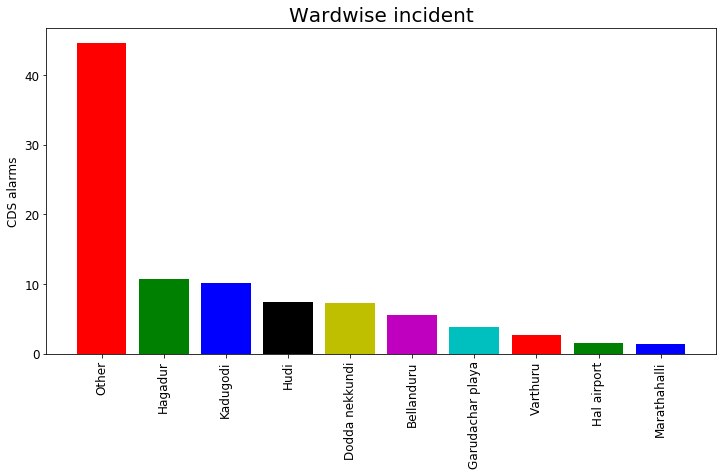

In [25]:
fig, axes = plt.subplots(figsize=(12,6))
data = train_data['wardName'].value_counts(normalize=True).sort_values(ascending=False)
data = data.head(10)
axes.bar(data.index, data*100, color=my_colors)
axes.set_ylabel("CDS alarms")
axes.set_xticklabels(data.index, rotation=90)
axes.set_title("Wardwise incident")
plt.show()

Alarm types

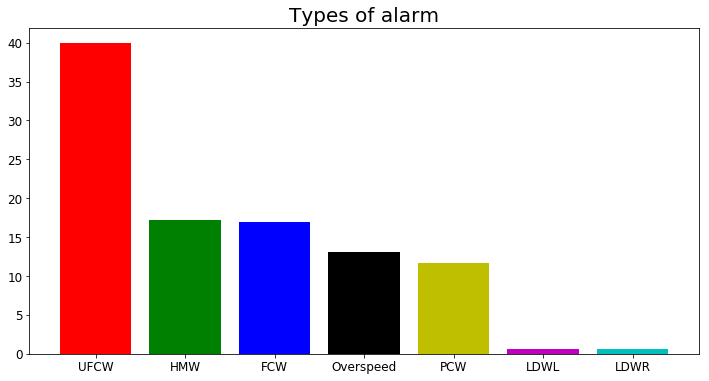

In [31]:
fig, axes = plt.subplots(figsize=(12,6))
data = train_data['alarmType'].value_counts(normalize=True)
axes.bar(data.index, data*100, color=my_colors)
axes.set_title('Types of alarm')
plt.show()

For Speed

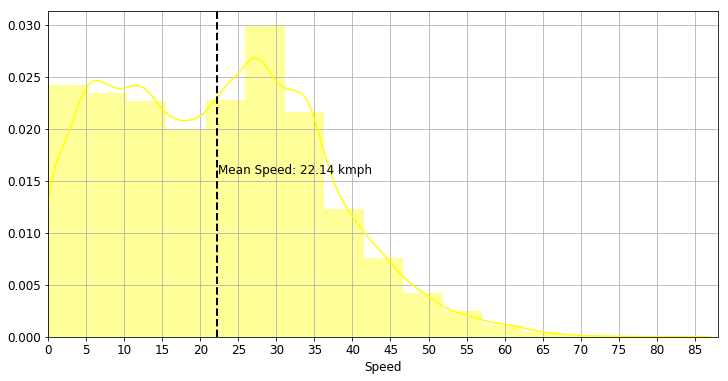

In [35]:
fig, axes = plt.subplots(figsize=(12,6))
data = train_data['speed']

sns.distplot(data, bins=16, color='yellow')
axes.axvline(data.mean(), color='k', linestyle='dashed', linewidth=2)

axes.set_xticks(np.arange(0, data.max()+5, 5))
axes.set_xticklabels([str(val) for val in np.arange(0, data.max()+5, 5)])
axes.set_xlim(0, data.max()+5)
axes.set_xlabel('Speed')
axes.set_title('')
axes.grid(True)

_ymin, _ymax = axes.get_ylim()
axes.text(data.mean() + data.mean()/100,
          (_ymax+_ymin)*0.5,
          'Mean Speed: {:.2f} kmph'.format(data.mean()))

plt.show()

For date and time

In [39]:
train_data.recordedDateTime = train_data.recordedDateTime.map(lambda x : pd.Timestamp(x, tz='Asia/Kolkata'))

In [40]:
print("Alarm data:")
print("Years: ", train_data.recordedDateTime.dt.year.unique())
print("Months: ", train_data.recordedDateTime.dt.month_name().unique())
print("Dates: ", train_data.recordedDateTime.dt.day.unique())

Alarm data:
Years:  [2018]
Months:  ['February' 'March' 'April' 'June' 'July']
Dates:  [ 1  2  3  5  6  7  8  9 12 14 15 16 19 20 21 22 23 24 25 26 27 28 10 13
 17 29 31  4 11 18 30]


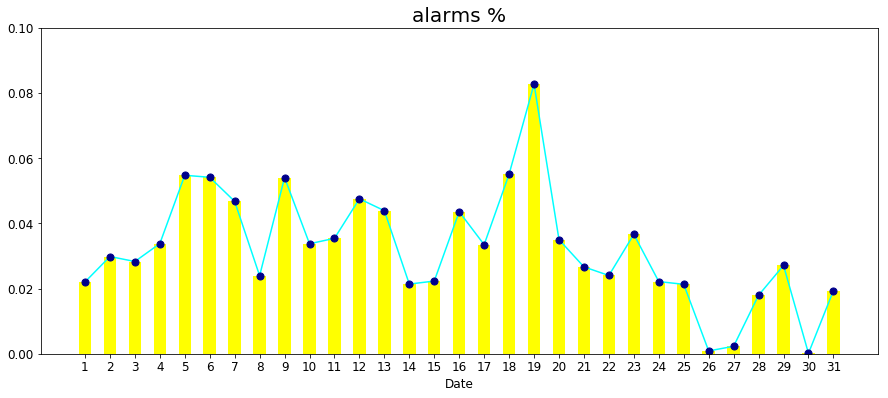

In [41]:
fig, axes = plt.subplots(figsize=(15,6))
train_data["dayOfMonth"] = train_data.recordedDateTime.dt.day
data = train_data["dayOfMonth"].value_counts(normalize=True).sort_index()
axes.bar(data.index, data, color='yellow', width=0.5, zorder=0)
axes.plot(data.index, data, color='cyan', zorder=1)
axes.scatter(data.index, data, s=50, color='darkblue', zorder=2)

axes.set_xlabel('Date')
axes.set_xticks(np.arange(1, 32))
axes.set_xticklabels([str(val) for val in np.arange(1, 32)])
axes.set_ylim(0, 0.1)
axes.set_title('alarms %')

plt.show()

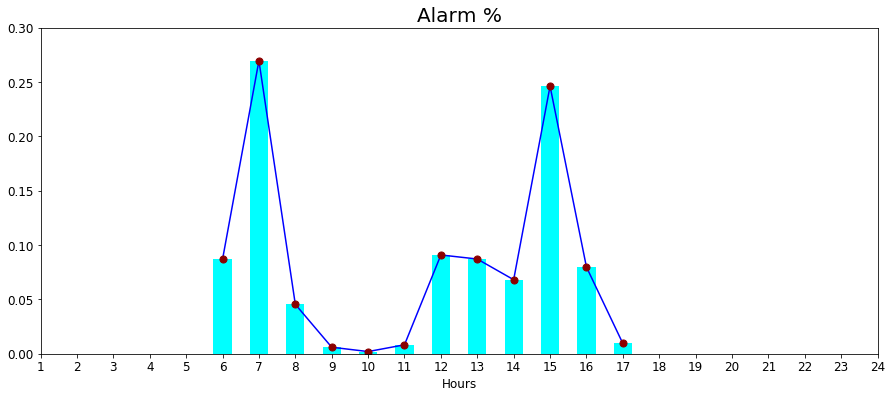

In [44]:
fig, axes = plt.subplots(figsize=(15,6))
train_data["hour"] = train_data.recordedDateTime.dt.hour
data = train_data["hour"].value_counts(normalize=True).sort_index()

axes.bar(data.index, data, color='cyan', width=0.5, zorder=0)
axes.plot(data.index, data, color='blue', zorder=1)
axes.scatter(data.index, data, s=50, color='darkred', zorder=2)

axes.set_xlabel('Hours')
axes.set_xticks(np.arange(1, 25))
axes.set_xticklabels([str(val) for val in np.arange(1, 25)])
axes.set_ylim(0, 0.3)
axes.set_title('Alarm %')

plt.show()

Locations by alarm type

Top 10 Most dangerous places

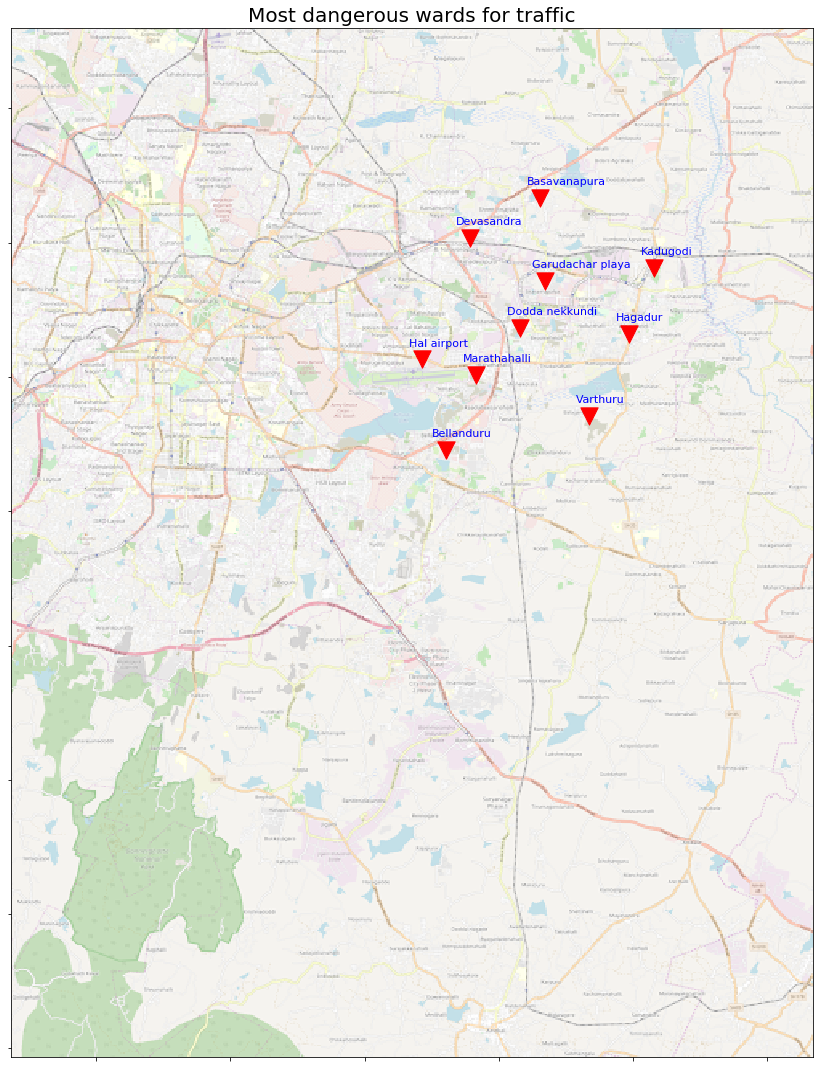

In [33]:
fig, axes = plt.subplots(figsize=(15,15))
cmap = plt.get_cmap("jet")

data = bbmp_data[bbmp_data.WARD_NAME.isin(ward_top)]

axes.scatter(data.LON, data.LAT, marker="v", s=300,
                   c='red', zorder=1)
axes.set_title("Most dangerous wards for traffic")

# Plot Bangalore map image
epsilon = 0.01
bound_box = [lon_min + epsilon, lon_max + epsilon, 
             lat_min + epsilon, lat_max + epsilon]

axes.imshow(bangalore_map, extent=bound_box, alpha=0.7, zorder=0)

# Add names of wards as text
for _idx, _ward_data in data.iterrows():
    axes.text(_ward_data.LON  - epsilon/2, _ward_data.LAT + epsilon/2, 
              _ward_data.WARD_NAME, color='blue', fontsize=11)

axes.set_yticklabels([])
axes.set_xticklabels([])

plt.tight_layout()
plt.show()